<a href="https://colab.research.google.com/github/Kevinlee49/PyTorch/blob/main/Tensorflow2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import os 
import html5lib
import tensorflow as tf
import seaborn as sns   

In [2]:
tf.__version__

'2.9.2'

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [60]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tensorflow2/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


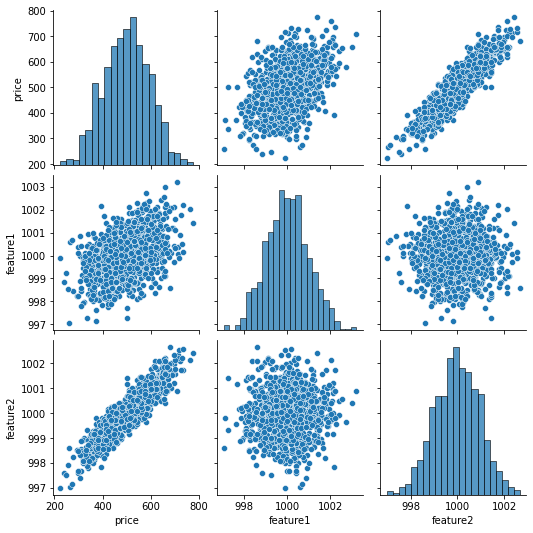

In [61]:
sns.pairplot(df)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df[['feature1','feature2']].values
y = df['price'].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
X_test

array([[ 999.54121558,  999.14114328],
       [1000.61862216, 1001.11905081],
       [1000.86079375, 1000.65496339],
       [ 999.45851362, 1001.06368241],
       [ 997.61547597,  999.57440788],
       [1000.14086546, 1000.83393652],
       [ 998.39657367, 1000.89778743],
       [1000.48772914,  999.32129144],
       [ 999.37620423, 1000.841348  ],
       [1000.56800092,  999.15416846],
       [1000.60331207, 1000.99323497],
       [1001.96902295,  999.6666088 ],
       [ 999.47784011,  999.32573058],
       [ 999.15367572,  999.35665186],
       [1002.56280406, 1000.55356428],
       [1000.18750969,  999.21064524],
       [1001.48563193,  999.42770753],
       [ 999.31556397, 1002.1187026 ],
       [1000.17527252, 1001.76025939],
       [1001.02278582, 1000.28145855],
       [ 998.2993191 ,  998.89970792],
       [ 999.62911717,  999.54799684],
       [ 998.77177786,  999.23169313],
       [ 999.48763192,  998.86570158],
       [1000.2156187 , 1000.65805738],
       [ 999.64595458, 10

In [47]:
X_train.shape

(750, 2)

In [48]:
X_test.shape

(250, 2)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

In [68]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [69]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.37979357, 0.50659872],
       [0.27945211, 0.47794684],
       [0.3483822 , 0.67249317],
       ...,
       [0.54913363, 0.78470227],
       [0.2834197 , 0.38107935],
       [0.56282703, 0.41595995]])

In [70]:
#X_train.max()
X_train.min()

0.0

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
#model = Sequential([Dense(4, activation = 'relu'), 
#                    Dense(2, activation = 'relu'),
#                    Dense(1)])
# same code
model = Sequential()
model.add(Dense(4,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [73]:
model.fit(x=X_train, y=y_train, epochs = 200)

Epoch 1/200
24/24 [==============================] - 1s 3ms/step - loss: 256385.9375
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 256294.4062
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 256211.7812
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 256125.8594
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 256041.7969
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 255954.7500
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 255861.4375
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 255761.0312
Epoch 9/200
24/24 [==============================] - 0s 3ms/step - loss: 255652.5469
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 255535.8906
Epoch 11/200
24/24 [==============================] - 0s 2ms/step - loss: 255411.2188
Epoch 12/200
24/24 [==============================] - 0s 2ms/st

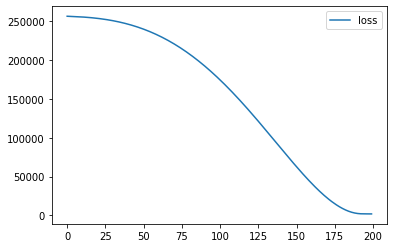

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [75]:
model.evaluate(X_test, y_test, verbose = 0)

1763.220703125

In [76]:
model.evaluate(X_train, y_train, verbose = 0)

1829.7418212890625

In [77]:
test_predictions = model.predict(X_test)
test_predictions

8/8 [==============================] - 0s 3ms/step


array([[446.934  ],
       [576.4211 ],
       [565.46533],
       [528.4482 ],
       [390.45422],
       [545.10016],
       [479.45532],
       [492.02496],
       [515.4155 ],
       [487.80746],
       [570.2733 ],
       [565.3869 ],
       [452.5846 ],
       [441.2251 ],
       [627.7953 ],
       [475.36386],
       [535.88226],
       [569.35095],
       [587.28986],
       [555.3563 ],
       [387.54785],
       [468.32114],
       [420.72726],
       [432.6874 ],
       [540.27997],
       [551.173  ],
       [517.3622 ],
       [463.4831 ],
       [575.5002 ],
       [465.28516],
       [482.00452],
       [494.42758],
       [469.09436],
       [595.7966 ],
       [480.3669 ],
       [440.10977],
       [540.08887],
       [535.8313 ],
       [483.05768],
       [409.18973],
       [580.8556 ],
       [463.44333],
       [571.2264 ],
       [494.80203],
       [503.67377],
       [588.09045],
       [630.3287 ],
       [510.4868 ],
       [410.6944 ],
       [491.27908],


In [78]:
test_predictions = pd.Series(test_predictions.reshape(250,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions], axis = 1)
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df



,Test True Y,Model Predictions
0,402.296319,446.933990
1,624.156198,576.421082
2,582.455066,565.465332
3,578.588606,528.448181
4,371.224104,390.454224
...,...,...
245,515.778446,497.465851
246,462.881631,483.748932
247,507.434391,525.420715
248,467.460596,488.116730


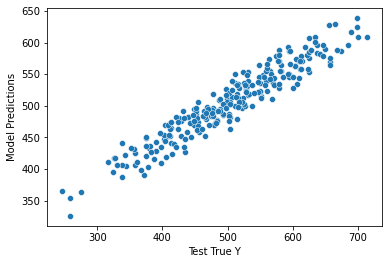

In [79]:
sns.scatterplot(x='Test True Y', y = 'Model Predictions', data = pred_df)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [82]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions']) # this value is not important itself, just need to compare with our context.

33.44019967736275

In [83]:
df.describe() # here, I can see mean 498$, so 33 mean_absolute error is roughly 9% which is quite high, I need to diminish this value.

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [84]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']) # same value of model.evaluate(X_test, y_test, verbose = 0)

1763.2207015963277

In [136]:
new = [[998,1000]]

In [137]:
new = scaler.transform(new)
model.predict(new)

1/1 [==============================] - 0s 19ms/step


array([[424.30933]], dtype=float32)

In [138]:
from tensorflow.keras.models import load_model

In [139]:
model.save('my_new_model.h5')

In [140]:
later_model = load_model('my_new_model.h5')

In [141]:
later_model.predict(new)

1/1 [==============================] - 0s 54ms/step


array([[424.30933]], dtype=float32)